In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Leemos el archivo con datos metereológicos del nogal con extensión csv.
Nogal = pd.DataFrame(pd.read_csv("meteo-nogal-09.csv", engine = "python"))

In [3]:
Nogal.head()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Eliminamos las columnas que no contienen datos.
Nogal = Nogal.drop(Nogal.columns[Nogal.columns.str.contains('unnamed:', case = False)], axis = 1)
Nogal = Nogal.drop(Nogal.index[0]).reset_index(drop = True)
Nogal.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
1,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
2,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737
4,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39


In [5]:
Nogal.dtypes

DATE            object
TIME            object
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
dtype: object

In [6]:
#Creamos la variable DATETIME con DATE y TIME.
Nogal["DATETIME"] = Nogal["DATE"] + ' ' + Nogal["TIME"]

In [7]:
Nogal.drop(["DATE", "TIME"], axis = 1, inplace = True)

In [8]:
#Pasamos el objeto DATETIME a tipo datetime.
Nogal["DATETIME"] = pd.to_datetime(Nogal.apply(lambda x: x['DATETIME'], 1), dayfirst = True)
Nogal.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00


In [9]:
Nogal.dtypes

u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
DATETIME       datetime64[ns]
dtype: object

In [10]:
#Separamos el mes, día, hora y minuto.
Nogal['MES'] = Nogal['DATETIME'].dt.month
Nogal['DÍA'] = Nogal['DATETIME'].dt.day
Nogal['HORA'] = Nogal['DATETIME'].dt.hour
Nogal['MINUTO'] = Nogal['DATETIME'].dt.minute
Nogal.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME,MES,DÍA,HORA,MINUTO
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00,1.0,1.0,0.0,10.0
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00,1.0,1.0,0.0,20.0
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00,1.0,1.0,0.0,50.0


In [11]:
#Los DataFrames solo coinciden a partir del tercer renglón del DataFrame Nogal. Por lo tanto, eliminamos:
Nogal = Nogal.drop(Nogal.index[0:2]).reset_index(drop = True)
Nogal.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME,MES,DÍA,HORA,MINUTO
0,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
1,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
2,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00,1.0,1.0,0.0,50.0
3,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,0.840,1.097,0.9210001,7.089,2009-01-01 01:00:00,1.0,1.0,1.0,0.0
4,0.611,0.7270001,-0.126,8.72,1.5,-180.6,23.71,-26.72,0.9820001,8.16,0.832,1.084,0.901,6.943,2009-01-01 01:10:00,1.0,1.0,1.0,10.0


In [12]:
#Luego, coinciden cada 30 minutos. Tomamos solo los valores cada 30 minutos de Nogal.
Nogal = Nogal[((Nogal['MINUTO'] == 30.0) | (Nogal['MINUTO'] == 0.0)) & (Nogal['DATETIME'] < '2010-01-01 00:30:00')]
Nogal = Nogal.reset_index(drop = True)
Nogal.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME,MES,DÍA,HORA,MINUTO
17441,1.676,-0.139,14.36,1113,-79.21,NAN,NAN,3.067,14.7,0.407,1.672,0.681,5.126,NaN,2009-12-31 22:00:00,12.0,31.0,22.0,0.0
17442,1.196,-0.12,14.17,1170,-78.89,NAN,NAN,2.683,14.63,0.388,1.664,0.645,4.855,NaN,2009-12-31 22:30:00,12.0,31.0,22.0,30.0
17443,0.454,-0.074,12.63,1060,-72.47,NAN,NAN,2.419,13,0.472,1.497,0.707,5.354,NaN,2009-12-31 23:00:00,12.0,31.0,23.0,0.0
17444,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN,2009-12-31 23:30:00,12.0,31.0,23.0,30.0
17445,0.72,-0.078,11.02,1071,-70.44,NAN,NAN,2.068,11.28,0.521,1.336,0.696,5.299,NaN,2010-01-01 00:00:00,1.0,1.0,0.0,0.0


In [13]:
#Se declara una variable para las columnas.
rows = {"u_Avg", "v_Avg", "w_Avg", "t_Avg", "kh20_Avg", "net_rad_Avg", "shf1_Avg", "shf2_Avg", "vv_Avg", "airT_Avg", 
        "rh_Avg", "e_sat_Avg", "e_Avg", "h2o_hmp_Avg"}

#Convertimos las columnas en variables númericas float64.
for row in rows:
    
    Nogal[row] = Nogal[row].astype(dtype = np.float64)
    
Nogal.dtypes

u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
DATETIME       datetime64[ns]
MES                   float64
DÍA                   float64
HORA                  float64
MINUTO                float64
dtype: object

In [14]:
#Leemos el segundo archivo de los datos del suelo con extensión csv.
Suelo = pd.DataFrame(pd.read_csv("soil-nogal-09.csv", engine = "python"))

In [15]:
Suelo.head()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_20cm.1,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1
0,147,2009,1,30,0.959,0.972,0.992,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147,2009,1,100,0.958,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,147,2009,1,130,0.956,0.972,0.993,1.004,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,147,2009,1,200,0.955,0.972,0.993,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,147,2009,1,230,0.953,0.972,0.994,1.005,1.027,1.063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Filtramos para quedarnos con las variables de interés.
Suelo = Suelo.filter(['2 Year_RTM  L', '3 Day_RTM  L', '4 Hour_Minute_RTM  L', 'Tsuelo_10cm', 'Tsuelo_20cm', 'Tsuelo_30cm',
                      'Tsuelo_40cm', 'Tsuelo_55cm', 'Tsuelo_70cm', 'Tsuelo_85cm', 'Tsuelo_100cm'], axis=1)
Suelo.head()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,2009,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,2009,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,2009,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,2009,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,2009,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [17]:
#Para crear una columna de Fechas, se crearán dos columnas: minutos y horas.
#La columna 4 la convertimos a tipo string, es decir, carácteres, pues las horas están en formato de puros caracteres.
Suelo['4 Hour_Minute_RTM  L'] = Suelo['4 Hour_Minute_RTM  L'].astype(str)

In [18]:
#Llenaremos la columna de horas y de minutos.
#Declaramos los arreglo para las horas y los minutos aún sin dimensiones específicas:
HORA = [ ]
MINUTO = [ ]

#Usamos un contador i para que recorra todo el DataFrame Suelo
for i in range(0, len(Suelo)):
    #¿Tiene 4 carácteres?
    if (len(str(Suelo['4 Hour_Minute_RTM  L'][i])) == 4):
        #¿La hora es 2400? Por el caso de cuando tenemos la hora 24:00, para cambiarla a 00:00
        if(str(Suelo['4 Hour_Minute_RTM  L'][i])[0:2] == '24'):
            HORA.append('00')
            MINUTO.append('00')
        else:
            HORA.append(str(Suelo['4 Hour_Minute_RTM  L'][i])[0:2])
            MINUTO.append(str(Suelo['4 Hour_Minute_RTM  L'][i])[2:4])
    #¿Tiene 3 carácteres (las primeras 9 horas)?
    elif (len(str(Suelo['4 Hour_Minute_RTM  L'][i])) == 3):
        #Guardamos en HORA el primer carácter, y en MINUTO los otros dos.
        HORA.append(str(Suelo['4 Hour_Minute_RTM  L'][i])[0:1])
        MINUTO.append(str(Suelo['4 Hour_Minute_RTM  L'][i])[1:3])
    #¿Tiene 2 carácteres (Para los primeros 30 minutos del día)?
    elif (len(str(Suelo['4 Hour_Minute_RTM  L'][i])) == 2):
        HORA.append('00')
        MINUTO.append(str(Suelo['4 Hour_Minute_RTM  L'][i])[0:2])
        
#Ahora ya podemos escribir el arreglo de los Días del DataFrame Suelo.
DÍAS = [Suelo['3 Day_RTM  L'][i] for i in range(0,len(Suelo))]

In [19]:
#Crearemos un nuevo DataFrame con los días, horas y minutos del DataFrame Suelo.
#La variable f guardará las columnas del nuevo DataFrame.
f = {'DÍAS': DÍAS, 'HORA': HORA, 'MINUTO': MINUTO}
df_dates = pd.DataFrame(data = f)
df_dates.head()

,DÍAS,HORA,MINUTO
0,1,00,30
1,1,1,00
2,1,1,30
3,1,2,00
4,1,2,30


In [20]:
DÍA = [ ]

for n in range(0, len(df_dates)):
    
    if (df_dates['HORA'][n] == '00' and df_dates['MINUTO'][n] == '00'):
    
        DÍA.append(df_dates['DÍAS'][n] + 1)
    
    else:
    
        DÍA.append(df_dates['DÍAS'][n])

df_dates['DÍA'] = DÍA
df_dates.head()

,DÍAS,HORA,MINUTO,DÍA
0,1,00,30,1
1,1,1,00,1
2,1,1,30,1
3,1,2,00,1
4,1,2,30,1


In [21]:
#Ahora procedemos a crear una variable de tipo string para el Año, el número de día, hora y minuto.
fechas = [ ]

#Corremos la variable i por todo el DataFrame Suelo.
for i in range(0, len(Suelo)):
    
    fechas.append('2009 ' + str(df_dates['DÍA'][i]) + ' ' + df_dates['HORA'][i] + ' ' + df_dates['MINUTO'][i])

In [22]:
#Ahora, ese arreglo de Fechas lo pasamos a ser una variable tipo Datetime.
FECHA = [ ]

#Recorremos la variable i en todo el arreglo Suelo.
for i in range(0, len(Suelo)):
    w = datetime.datetime.strptime(fechas[i], '%Y %j %H %M')
    F = w.isoformat(' ')
    FECHA.append(F)

In [23]:
#Y ahora sí podemos agregar la columna FECHA al DataFrame Suelo:
Suelo['FECHAS'] = FECHA
Suelo.tail()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,FECHAS
17477,2009,365,2200,13.96,14.13,14.82,15.23,15.72,16.56,17.27,18.14,2009-12-31 22:00:00
17478,2009,365,2230,13.96,14.15,14.83,15.23,15.72,16.56,17.27,18.14,2009-12-31 22:30:00
17479,2009,365,2300,13.96,14.16,14.83,15.24,15.72,16.55,17.27,18.14,2009-12-31 23:00:00
17480,2009,365,2330,13.95,14.16,14.85,15.24,15.72,16.55,17.26,18.14,2009-12-31 23:30:00
17481,2009,365,2400,13.94,14.19,14.85,15.24,15.72,16.55,17.26,18.13,2010-01-01 00:00:00


In [24]:
#Convertimos la variable FECHAS en una variable Datetime
Suelo['DATETIME'] = pd.to_datetime(Suelo.apply(lambda x: x['FECHAS'], 1), dayfirst = True)
Suelo = Suelo.drop(['FECHAS'], 1)
Suelo.dtypes

2 Year_RTM  L                    int64
3 Day_RTM  L                     int64
4 Hour_Minute_RTM  L            object
Tsuelo_10cm                    float64
Tsuelo_20cm                    float64
Tsuelo_30cm                    float64
Tsuelo_40cm                    float64
Tsuelo_55cm                    float64
Tsuelo_70cm                    float64
Tsuelo_85cm                    float64
Tsuelo_100cm                   float64
DATETIME                datetime64[ns]
dtype: object

In [25]:
#Quitamos los duplicados de Suelo y de Nogal.
Suelo = Suelo.drop_duplicates(subset = ['DATETIME'])
Nogal = Nogal.drop_duplicates(subset = ['DATETIME'])

In [26]:
#Para unir los dos DataFrames, relacionamos con la variable DATETIME.
df = pd.merge(Nogal, Suelo, on = ['DATETIME'])
df.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,1.227,0.685,-0.069,10.340,1.224,-175.5,23.61,-26.46,1.421,9.059999,...,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,0.885,0.992,-0.167,8.760,1.450,-183.4,23.33,-26.98,1.390,8.340000,...,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,0.118,1.321,-0.071,8.690,1.422,-187.8,24.04,-27.16,1.338,7.539001,...,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,0.755,1.193,-0.149,7.612,1.360,-174.0,20.87,-21.68,1.457,6.760000,...,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,1.080,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,...,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [27]:
#Filtramos para variables de interés.
df = df.filter(['DATETIME', 'Tsuelo_10cm', 'Tsuelo_20cm', 'Tsuelo_30cm', 'Tsuelo_40cm', 'Tsuelo_55cm', 'Tsuelo_70cm', 
                'Tsuelo_85cm', 'Tsuelo_100cm', 't_Avg', 'air_Avg', 'net_rad_Avg', 'airT_Avg'], axis = 1)
df.head(1247)

,DATETIME,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,t_Avg,net_rad_Avg,airT_Avg
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,10.340000,-175.500000,9.059999
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,8.760000,-183.400000,8.340000
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,8.690000,-187.800000,7.539001
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,7.612000,-174.000000,6.760000
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,7.761000,-170.700000,7.288001
5,2009-01-01 03:00:00,14.15,14.67,15.28,15.55,16.12,17.02,17.73,18.59,7.187000,-177.700000,7.193000
6,2009-01-01 03:30:00,14.10,14.66,15.28,15.56,16.13,17.02,17.73,18.59,7.409000,-176.900000,6.351000
7,2009-01-01 04:00:00,14.05,14.64,15.28,15.58,16.13,17.02,17.73,18.59,7.086000,-162.300000,5.938000
8,2009-01-01 04:30:00,14.01,14.62,15.28,15.59,16.14,17.02,17.73,18.59,6.481000,-166.500000,6.085001
9,2009-01-01 05:00:00,13.97,14.61,15.29,15.59,16.14,17.02,17.74,18.60,6.488000,-174.700000,6.282000


In [28]:
#Seleccionar un día de Enero, y graficar la temperatura del aire, y las 4 temperaturas del subsuelo.
#Graficaremos las temperaturas del 26 de Enero.

#Creamos una DataFrame para los valores de la gráfica del 26 de Enero.
df_graph1 = df[df['DATETIME'] < '2009-01-27']
df_graph1 = df_graph1.loc[1200:1246]
df_graph1_s = df_graph1.filter(['Tsuelo_10cm', 'Tsuelo_20cm', 'Tsuelo_40cm', 'Tsuelo_85cm'], axis = 1)

#Convertimos a float64 las variables object para operar con números.
df_graph1 = df_graph1.apply(pd.to_numeric, errors = 'coerce')
df_graph1_s

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm
1200,18.20,18.42,18.17,18.45
1201,18.13,18.40,18.17,18.45
1202,18.07,18.39,18.17,18.45
1203,18.00,18.36,18.18,18.46
1204,17.94,18.34,18.19,18.46
1205,17.88,18.32,18.20,18.46
1206,17.82,18.30,18.21,18.46
1207,17.76,18.27,18.21,18.46
1208,17.70,18.24,18.21,18.46
1209,17.64,18.21,18.21,18.46


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

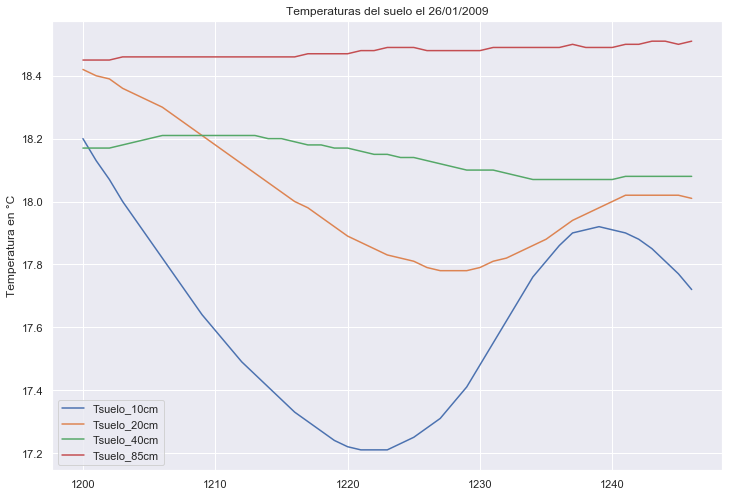

In [29]:
#Hacemos dos gráficas: la gráfica para las temperaturas del suelo del 4 de Enero y la gráfica para el aire de ese mismo día.
#Temperaturas del suelo del 26/01/2009.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_graph1_s.plot(); plt.legend(loc = 'best')
plt.title("Temperaturas del suelo el 26/01/2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

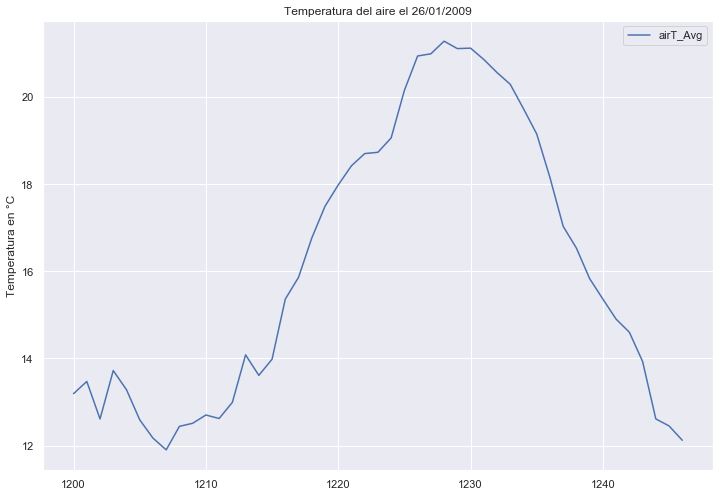

In [30]:
#Hacemos la gráfica de la temperatura del aire para el 26/01/2009.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_graph1["airT_Avg"].plot(); plt.legend(loc = 'best')
plt.title("Temperatura del aire el 26/01/2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

In [31]:
#Realizar una gráfica de temperaturas T_max, T_min y T_promedio diarias para el año completo 2009.
df_graph2 = df
df_graph2['DÍA'] = df_graph2['DATETIME'].dt.day
df_graph2['MES'] = df_graph2['DATETIME'].dt.month

#Creamos un DataFrame para cada una de las 4 temperaturas del suelo: 10, 20, 40 y 85.
#Calculamos la temperatura máxima, mínima y promedio.

#DataFrame para la temperatura del suelo a los 10 cm.
df_10 = df_graph2.filter(['DÍA', 'MES','Tsuelo_10cm'], axis = 1)
df_10["Tsuelo_10cm_max"] = np.round(df_10.groupby(["MES", "DÍA"])["Tsuelo_10cm"].transform("max"), decimals = 1)
df_10["Tsuelo_10cm_min"] = np.round(df_10.groupby(["MES", "DÍA"])["Tsuelo_10cm"].transform("min"), decimals = 1)
df_10["Tsuelo_10cm_mean"] = np.round(df_10.groupby(["MES", "DÍA"])["Tsuelo_10cm"].transform("mean"), decimals = 1)
#Quitamos los datos que no se van a graficar.
df_10 = df_10.drop(['Tsuelo_10cm', 'DÍA', 'MES'], 1)

#DataFrame para la temperatura del suelo a los 20 cm.
df_20 = df_graph2.filter(['DÍA', 'MES', 'Tsuelo_20cm'], axis = 1)
df_20["Tsuelo_20cm_max"] = np.round(df_20.groupby(["MES", "DÍA"])["Tsuelo_20cm"].transform("max"), decimals = 1)
df_20["Tsuelo_20cm_min"] = np.round(df_20.groupby(["MES", "DÍA"])["Tsuelo_20cm"].transform("min"), decimals = 1)
df_20["Tsuelo_20cm_mean"] = np.round(df_20.groupby(["MES", "DÍA"])["Tsuelo_20cm"].transform("mean"), decimals = 1)
#Quitamos los datos que no se van a graficar.
df_20 = df_20.drop(['Tsuelo_20cm', 'DÍA', 'MES'], 1)

#DataFrame para la temperatura del suelo a los 40 cm.
df_40 = df_graph2.filter(['DÍA', 'MES', 'Tsuelo_40cm'], axis = 1)
df_40["Tsuelo_40cm_max"] = np.round(df_40.groupby(["MES", "DÍA"])["Tsuelo_40cm"].transform("max"), decimals = 1)
df_40["Tsuelo_40cm_min"] = np.round(df_40.groupby(["MES", "DÍA"])["Tsuelo_40cm"].transform("min"), decimals = 1)
df_40["Tsuelo_40cm_mean"] = np.round(df_40.groupby(["MES", "DÍA"])["Tsuelo_40cm"].transform("mean"), decimals = 1)
#Quitamos los datos que no se van a graficar.
df_40 = df_40.drop(['Tsuelo_40cm','DÍA','MES'],1)

#DataFrame para la temperatura del suelo a los 85 cm.
df_85 = df_graph2.filter(['DÍA', 'MES', 'Tsuelo_85cm'], axis = 1)
df_85["Tsuelo_85cm_max"] = np.round(df_85.groupby(["MES", "DÍA"])["Tsuelo_85cm"].transform("max"), decimals = 1)
df_85["Tsuelo_85cm_min"] = np.round(df_85.groupby(["MES", "DÍA"])["Tsuelo_85cm"].transform("min"), decimals = 1)
df_85["Tsuelo_85cm_mean"] = np.round(df_85.groupby(["MES", "DÍA"])["Tsuelo_85cm"].transform("mean"),decimals = 1)

#Quitamos los datos que no se van a graficar.
df_85 = df_85.drop(['Tsuelo_85cm', 'DÍA', 'MES'], 1)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

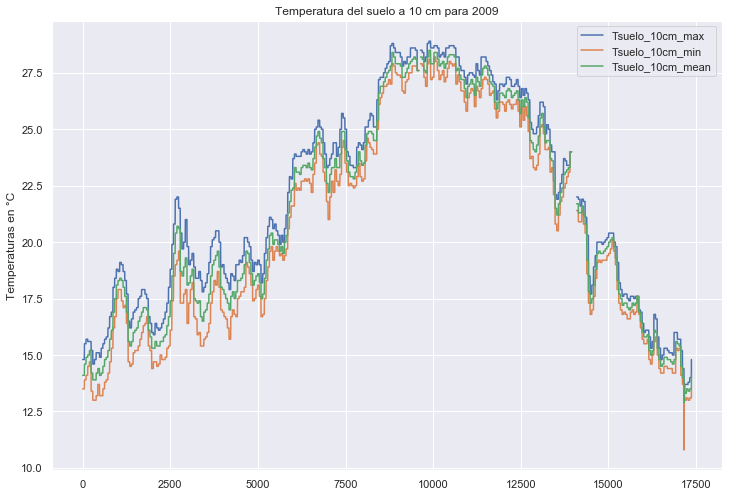

In [32]:
#Gráfica para la Tsuelo_10cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_10.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 10 cm para 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

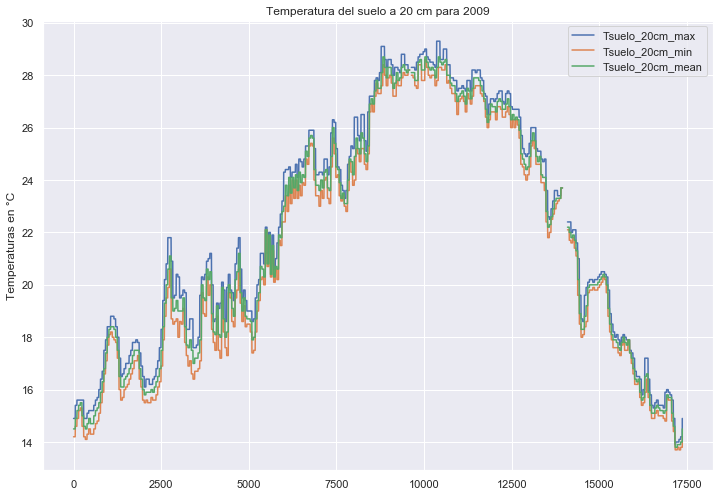

In [33]:
#Gráfica para la Tsuelo_20cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_20.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 20 cm para 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

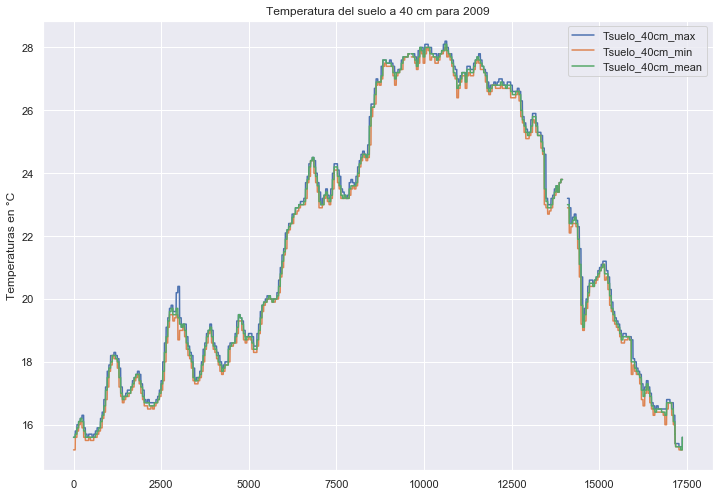

In [34]:
#Gráfica para la Tsuelo_40cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_40.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 40 cm para 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

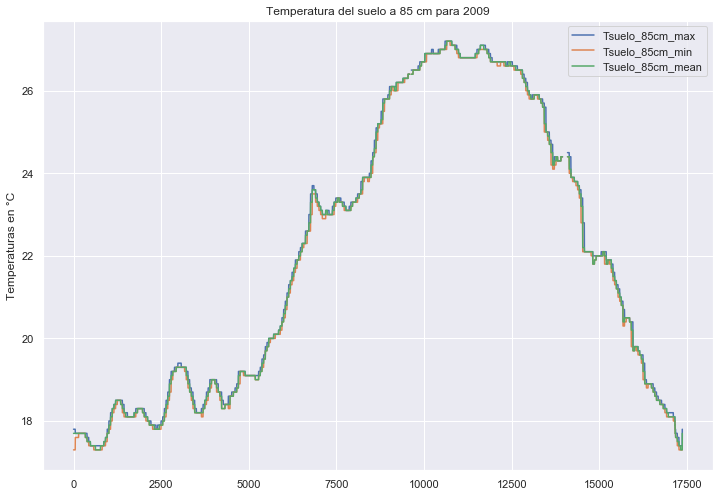

In [35]:
#Gráfica para la Tsuelo_85cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_85.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 85 cm para 2009")
plt.ylabel("Temperaturas en °C")
plt.grid(True)
plt.show

In [36]:
#Realizamos la gráfica de la temperatura del aire.
df_graph2 = df_graph2.filter(['DÍA', 'MES', 'airT_Avg'], axis = 1)

#Convertimos los datos de la temperatura del aire a float64.
df_graph2[df_graph2.columns[1:3]] = df_graph2[df_graph2.columns[1:3]].apply(pd.to_numeric, errors = 'coerce')

#Agrupamos y usamos transform para obtener la temperatura máxima, mínima y promedio del aire.
df_graph2["airT_Avg_max"] = np.round(df_graph2.groupby(["MES", "DÍA"])["airT_Avg"].transform("max"), decimals = 1)
df_graph2["airT_Avg_min"] = np.round(df_graph2.groupby(["MES", "DÍA"])["airT_Avg"].transform("min"), decimals = 1)
df_graph2["airT_Avg_mean"] = np.round(df_graph2.groupby(["MES", "DÍA"])["airT_Avg"].transform("mean"), decimals = 1)

#Y eliminamos las columnas que no utilizaremos para esta gráfica.
df_graph2 = df_graph2.drop(['airT_Avg', 'DÍA', 'MES'], 1)
df_graph2.head()

,airT_Avg_max,airT_Avg_min,airT_Avg_mean
0,25.4,0.5,14.7
1,25.4,0.5,14.7
2,25.4,0.5,14.7
3,25.4,0.5,14.7
4,25.4,0.5,14.7


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

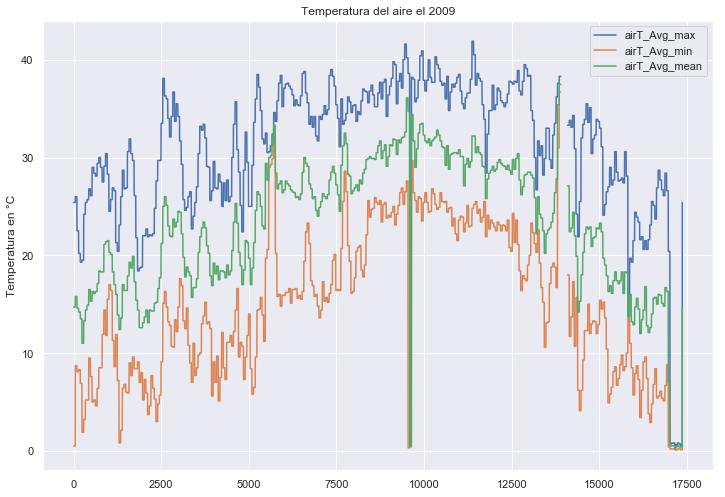

In [37]:
#Y ahora creamos la gráfica de la temperatura del aire promedio, máxima y mínima.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_graph2.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del aire el 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

In [38]:
#Calcular el promedio cada 30 minutos durante el día para el mes de Enero de la temperatura del aire y las 8 temperaturas 
#promedio del subsuelo, para posteriormente graficar la variación en 24 horas de las temperaturas de interés.

#Reducimos el DataFrame para tener solo datos de Enero
df_graph3 = df[df['DATETIME'] < '2009-02-01 00:00:00']

#Tomamos las temperaturas del suelo
df_graph3_s = df_graph3.filter(['Tsuelo_10cm', 'Tsuelo_20cm', 'Tsuelo_30cm', 'Tsuelo_40cm', 'Tsuelo_55cm', 'Tsuelo_70cm', 
                                'Tsuelo_85cm', 'Tsuelo_100cm'], axis = 1)
df_graph3_s.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

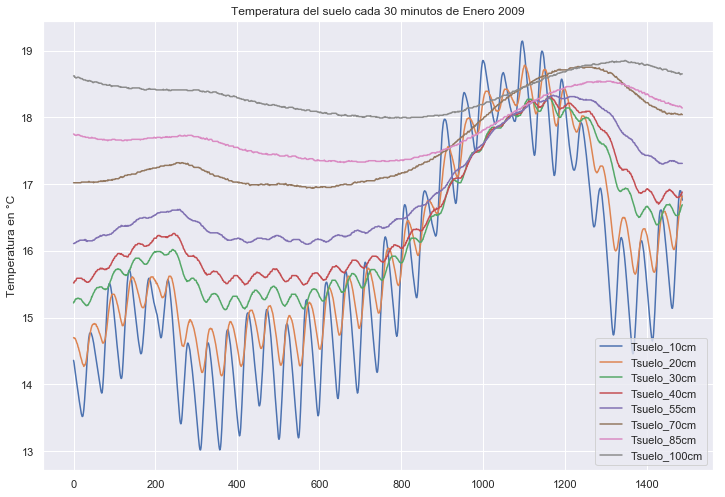

In [39]:
#Graficamos las temperaturas del suelo cada media hora. Los datos son solo del mes de Enero de 2009.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_graph3_s.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo cada 30 minutos de Enero 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

In [40]:
#Ahora graficamos la temperatura del aire cada 30 minutos.
df_graph4 = df_graph3.filter(['airT_Avg'], axis = 1)
df_graph4 = df_graph4.apply(pd.to_numeric, errors = 'coerce')

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

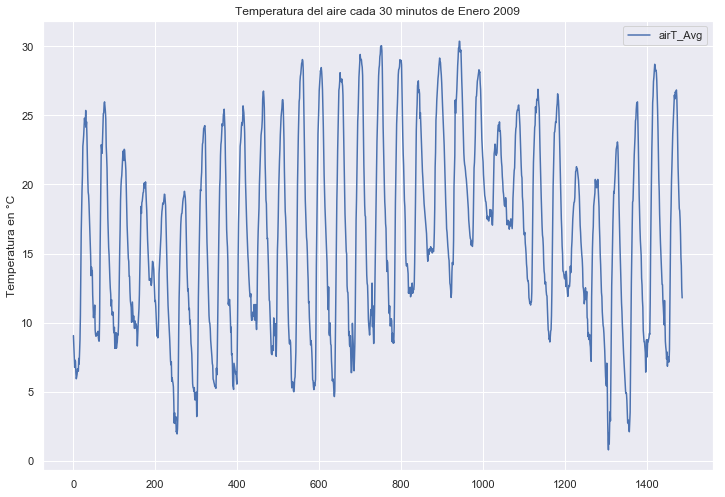

In [41]:
#Desupués, hacemos la gráfica de temperatura del aire.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_graph4.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del aire cada 30 minutos de Enero 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

In [42]:
#Reproduciremos las gráficas aplicando el promedio móvil (rolling mean). Agregamos la variable fecha que desechamos anteriormente.
df_10['FECHA'] = df['DATETIME']
df_20['FECHA'] = df['DATETIME']
df_40['FECHA'] = df['DATETIME']
df_85['FECHA'] = df['DATETIME']
df_graph2['FECHA'] = df['DATETIME']

#Creamos un nuevo data frame para los promedios móviles.
df_10roll = pd.DataFrame()
df_20roll = pd.DataFrame()
df_40roll = pd.DataFrame()
df_85roll = pd.DataFrame()
df_airTroll = pd.DataFrame()

#Calculamos el promedio móvil de cada una de las temperaturas.
df_10roll["max10"] = df_10.Tsuelo_10cm_max.rolling(60, min_periods = 1).mean()
df_10roll["min10"] = df_10.Tsuelo_10cm_min.rolling(60, min_periods = 1).mean()
df_10roll["mean10"] = df_10.Tsuelo_10cm_mean.rolling(60, min_periods = 1).mean()

df_20roll["max20"] = df_20.Tsuelo_20cm_max.rolling(60, min_periods = 1).mean()
df_20roll["min20"] = df_20.Tsuelo_20cm_min.rolling(60, min_periods = 1).mean()
df_20roll["mean20"] = df_20.Tsuelo_20cm_mean.rolling(60, min_periods = 1).mean()

df_40roll["max40"] = df_40.Tsuelo_40cm_max.rolling(60, min_periods = 1).mean()
df_40roll["min40"] = df_40.Tsuelo_40cm_min.rolling(60, min_periods = 1).mean()
df_40roll["mean40"] = df_40.Tsuelo_40cm_mean.rolling(60, min_periods = 1).mean()

df_85roll["max85"] = df_85.Tsuelo_85cm_max.rolling(60, min_periods = 1).mean()
df_85roll["min85"] = df_85.Tsuelo_85cm_min.rolling(60, min_periods = 1).mean()
df_85roll["mean85"] = df_85.Tsuelo_85cm_mean.rolling(60, min_periods = 1).mean()

df_airTroll["max_air"] = df_graph2.airT_Avg_max.rolling(60, min_periods = 1).mean()
df_airTroll["min_air"] = df_graph2.airT_Avg_min.rolling(60, min_periods = 1).mean()
df_airTroll["mean_air"] = df_graph2.airT_Avg_mean.rolling(60, min_periods = 1).mean()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

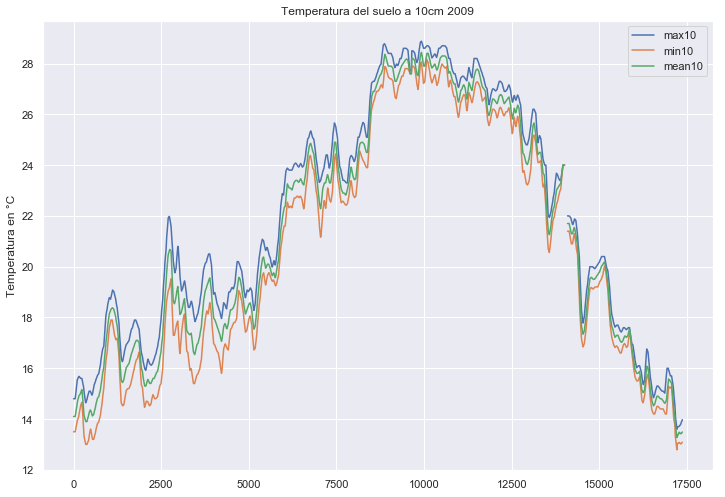

In [43]:
#Gráfica suavizada de la temperatura del suelo 10 cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_10roll.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 10cm 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

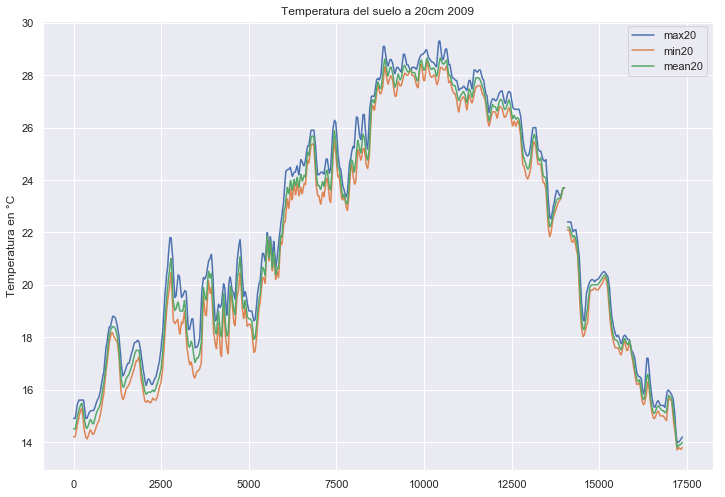

In [44]:
#Gráfica suavizada de la temperatura del suelo 20 cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_20roll.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 20cm 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

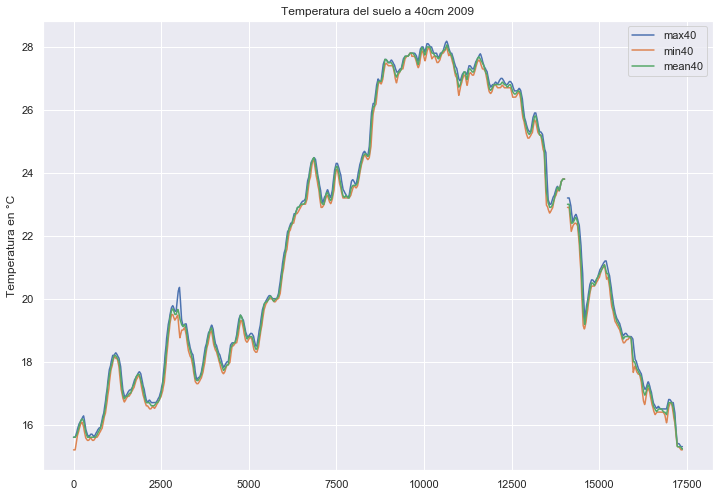

In [45]:
#Gráfica suavizada de la temperatura del suelo 40 cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_40roll.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 40cm 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

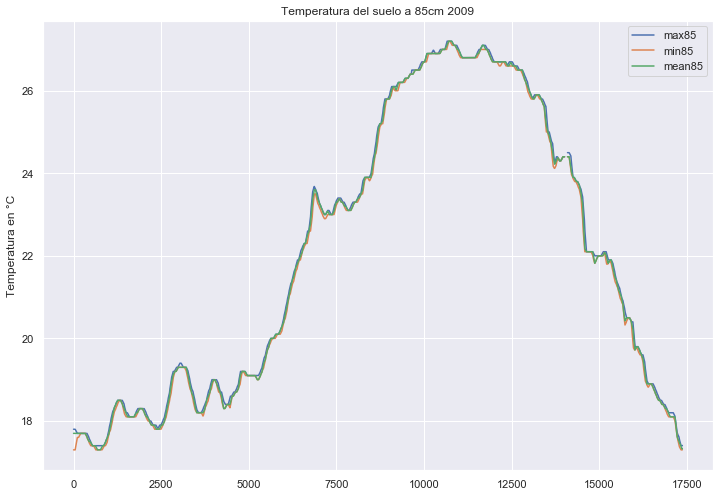

In [46]:
#Gráfica suavizada de la temperatura del suelo 85 cm.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_85roll.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del suelo a 85cm 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x595.44 with 0 Axes>

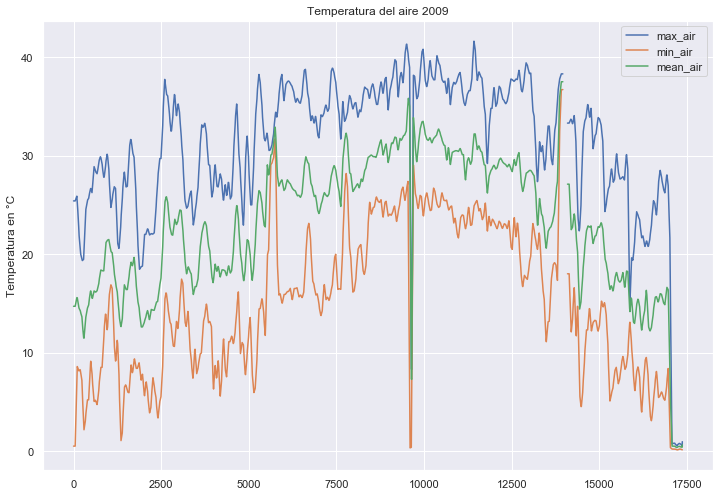

In [47]:
#Gráfica suavizada de la temperatura del aire.
sns.set(rc = {'figure.figsize':(12, 8.27)})
fig = plt.figure(); df_airTroll.plot(); plt.legend(loc = 'best')
plt.title("Temperatura del aire 2009")
plt.ylabel("Temperatura en °C")
plt.grid(True)
plt.show